In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,March_7,May_6,April_3,March_6,October_6,November_3,May_2,April_5,October_7,April,...,July_2,November,November_6,November_4,June_8,June_6,June,October_9,June_2,August_2
0,0.319904,-0.852495,-0.104311,-0.234575,0.143648,-0.068163,0.057135,-0.188754,-0.413652,0.542963,...,-0.655011,-0.029724,0.169057,0.877105,-0.097635,0.124188,-0.533503,0.546168,0.447825,0.247999
1,0.516930,-0.845069,0.035738,-0.318164,0.143648,-0.068163,-0.073538,-0.264366,-0.413652,0.370618,...,-0.655011,-0.029724,0.169057,0.877105,-0.097635,0.124188,-0.533503,0.546168,0.447825,0.247999
2,0.236701,-0.590339,-0.384591,-0.338490,0.306010,-0.252136,0.269578,-0.490678,0.027956,0.431238,...,-0.791696,-0.059900,-0.221572,0.660362,-0.338270,-0.219243,-0.343442,0.097252,0.316435,0.541576
3,0.216181,-0.520556,-0.387030,-0.122469,0.194688,-0.174424,0.024475,-0.561401,0.161050,0.384109,...,-0.391249,0.112655,-0.442822,0.389858,-0.311872,0.159662,-0.057381,0.435364,0.117374,0.544768
4,0.308101,-0.687532,-0.092262,-0.206767,0.150216,-0.855553,0.175943,-0.423188,0.207545,0.301806,...,-0.827292,-0.355776,-0.401138,0.511525,-0.353160,0.456894,-0.637407,0.339406,0.778754,0.128602
5,0.477551,-0.404820,0.208624,-0.202997,0.297595,-0.221453,0.063219,-0.418324,-0.158057,0.431075,...,-0.695802,0.038867,-0.058629,0.400418,-0.105268,0.373177,0.070192,0.525029,-0.180263,0.015283
6,0.676411,-0.416906,-0.209037,0.248931,0.427143,-0.803663,0.109402,-0.142730,0.037837,0.598782,...,-0.452283,-0.067090,-0.483680,0.738773,-0.359345,0.100392,-0.058368,-0.291575,-0.043173,0.875332
7,0.481080,-0.659332,0.260026,-0.159086,0.125576,-0.455988,-0.082889,-0.309788,-0.095395,0.397898,...,-0.973961,0.597043,-0.459519,0.480338,-0.135666,0.222062,-0.374039,0.159074,-0.083577,0.704231
8,0.570303,-0.832134,-0.328015,0.000734,0.527194,-0.348579,0.378568,-0.333625,-0.078566,0.296620,...,-0.766966,0.203473,-0.864525,0.809165,0.004613,0.124472,-0.622673,0.106663,0.693915,0.078166
9,0.783917,-0.844990,-0.004884,0.042361,-0.019894,-0.230216,-0.240418,-0.129845,-0.247034,0.342460,...,-0.568722,0.378247,-0.470466,0.399174,-0.207197,0.079987,-0.194390,0.200095,-0.102321,-0.125142


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[-6.90533815e-01, -2.20736769e-01, -1.43529326e-01,
        -1.32695675e+00, -3.35551855e-01,  7.36903996e-01,
        -5.54931184e-02,  1.27564677e+00, -2.20194045e+00,
         7.05230535e-01, -1.52876983e+00,  8.02366461e-02,
         5.29819361e-01, -5.63884761e-02,  3.24045363e-01,
         9.38223567e-01,  4.26739851e-01, -4.26673025e-01,
        -8.52215099e-01,  4.02725059e-01],
       [ 1.00356075e-01, -1.93900555e-01,  4.88719378e-01,
        -1.85061348e+00, -3.35551855e-01,  7.36903996e-01,
        -6.27967900e-01,  8.66305021e-01, -2.20194045e+00,
        -2.89465787e-01, -9.05216044e-02,  8.02366461e-02,
        -4.56116999e-01, -5.63884761e-02,  1.24096836e+00,
         9.38223567e-01,  4.26739851e-01, -4.26673025e-01,
         3.04058863e-02,  4.02725059e-01],
       [-1.02451884e+00,  7.26621135e-01, -1.40884924e+00,
        -1.97795359e+00,  5.13177854e-01, -6.97148612e-02,
         8.75206260e-01, -3.58885909e-01, -6.38969250e-02,
         6.04033638e-02, -5.3

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.60266474, -0.05157151,  0.7290428 , -0.5545848 , -1.18514886,
        -0.49424186,  0.06364178, -0.00604449, -0.20256497,  0.10921947,
         0.56785628, -0.96814529,  0.8806267 ,  0.71166743,  0.52356954,
         0.06090123,  1.42874398, -1.07868857,  0.37195417,  0.31859974],
       [-0.1729158 , -1.1236927 , -0.00956298, -0.66599333, -1.6036551 ,
         1.77606415, -1.30725011, -0.10534209, -1.03555508, -0.53426661,
        -0.79231082, -2.06803445, -0.41346921, -0.10459452,  1.97182703,
        -0.62233835, -0.21542517,  0.76827052, -0.47019066, -0.72283784],
       [-1.14838154, -0.17951572,  0.27486703, -1.29663738,  1.01840904,
         0.26754682,  1.0241404 , -0.63325826,  0.14260789,  1.6049554 ,
         1.128651  ,  0.79964203, -1.04320221,  0.58283709,  0.70299757,
        -1.0466532 ,  1.50612292, -0.22339936,  0.02632765, -0.00857597],
       [-0.42826589,  1.03411882,  0.48806855,  0.16586332, -1.39086467,
        -1.43117886,  0.88533762, -0.83507563, -

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 13}
Best Score: 0.39512750096534915
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 15}
Best Score: 0.23074509870580717
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 43}
Best Score: 0.41033101260654264
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 24}
Best Score: 0.34667670612385104
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}
Best Score: 0.17962958915050214


In [13]:
y_pred_list

[array([-0.11743736,  0.31975996,  0.0678564 ,  0.00545704,  0.18030208,
         0.13167273, -0.34425641, -0.40775092,  0.23712798, -0.26182919,
        -0.49152304,  0.51472147, -0.06938203,  0.44583849,  0.38481382,
        -0.39810469]),
 array([-0.16625629,  0.25403776,  0.21430879, -0.06672222,  0.14274371,
        -0.21439716, -0.38688095, -0.50970794,  0.0831    , -0.34446581,
        -0.66752698,  0.36284389,  0.23643783,  0.36595897,  0.29953602,
        -0.45070899]),
 array([ 0.02121776,  0.50529638,  0.01561075, -0.26884692,  0.48120928,
        -0.10511126, -0.27524352, -0.44895032,  0.081658  , -0.3853928 ,
        -0.64530371,  0.12507391, -0.01323493,  0.34004279,  0.30051275,
        -0.47436927]),
 array([-0.20207672,  0.62982019,  0.02286563, -0.1116546 ,  0.27122631,
         0.03010743, -0.25315102, -0.29854961,  0.27672171, -0.19026516,
        -0.54997564,  0.32513764, -0.16324297,  0.08343368,  0.48106776,
        -0.29324807]),
 array([-0.14769899,  0.36541657

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7473406948131021,
 0.5940995599066107,
 0.5620568194177715,
 0.7438107252605575,
 0.6157937276528858]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'Vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Vwind/20 predictors/comparison plots/randomforesty_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 13}
Best Score: 0.39512750096534915
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 15}
Best Score: 0.23074509870580717
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 43}
Best Score: 0.41033101260654264
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 24}
Best Score: 0.34667670612385104
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 10}
Best Score: 0.17962958915050214


In [21]:
y_pred_list_rf

[array([-0.11743736,  0.31975996,  0.0678564 ,  0.00545704,  0.18030208,
         0.13167273, -0.34425641, -0.40775092,  0.23712798, -0.26182919,
        -0.49152304,  0.51472147, -0.06938203,  0.44583849,  0.38481382,
        -0.39810469]),
 array([-0.16625629,  0.25403776,  0.21430879, -0.06672222,  0.14274371,
        -0.21439716, -0.38688095, -0.50970794,  0.0831    , -0.34446581,
        -0.66752698,  0.36284389,  0.23643783,  0.36595897,  0.29953602,
        -0.45070899]),
 array([ 0.02121776,  0.50529638,  0.01561075, -0.26884692,  0.48120928,
        -0.10511126, -0.27524352, -0.44895032,  0.081658  , -0.3853928 ,
        -0.64530371,  0.12507391, -0.01323493,  0.34004279,  0.30051275,
        -0.47436927]),
 array([-0.20207672,  0.62982019,  0.02286563, -0.1116546 ,  0.27122631,
         0.03010743, -0.25315102, -0.29854961,  0.27672171, -0.19026516,
        -0.54997564,  0.32513764, -0.16324297,  0.08343368,  0.48106776,
        -0.29324807]),
 array([-0.14769899,  0.36541657

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7473406948131021,
 0.5940995599066107,
 0.5620568194177715,
 0.7438107252605575,
 0.6157937276528858]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'Vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/Uwind/20 predictors/pearson/comparison plots/randomforest


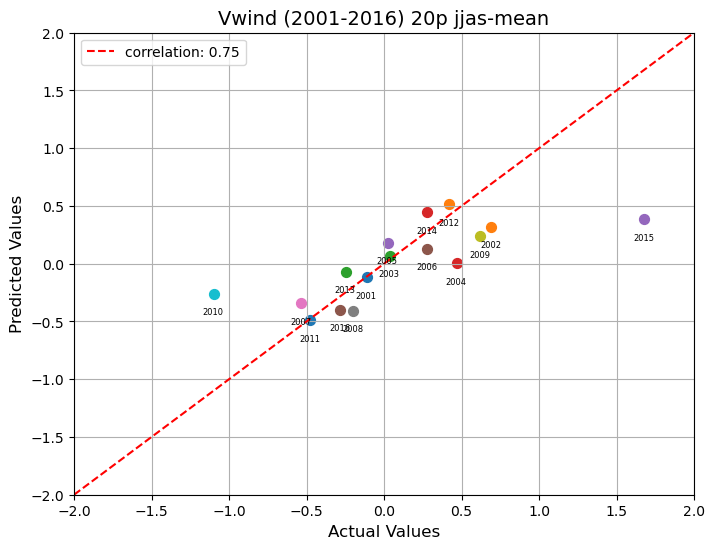

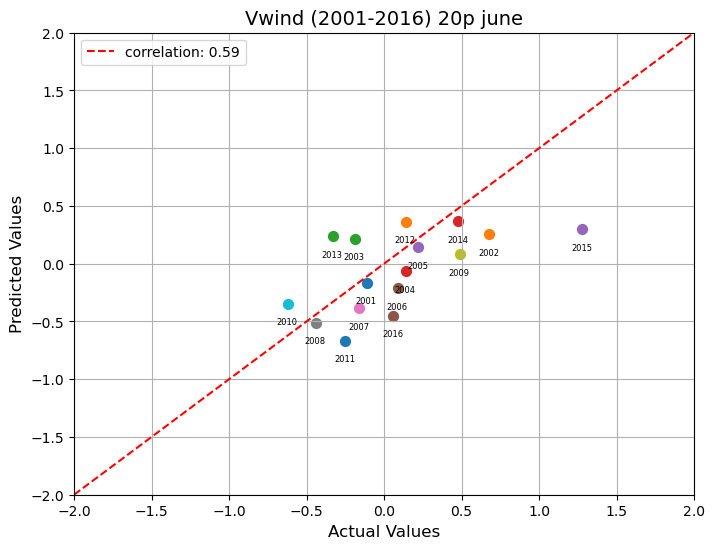

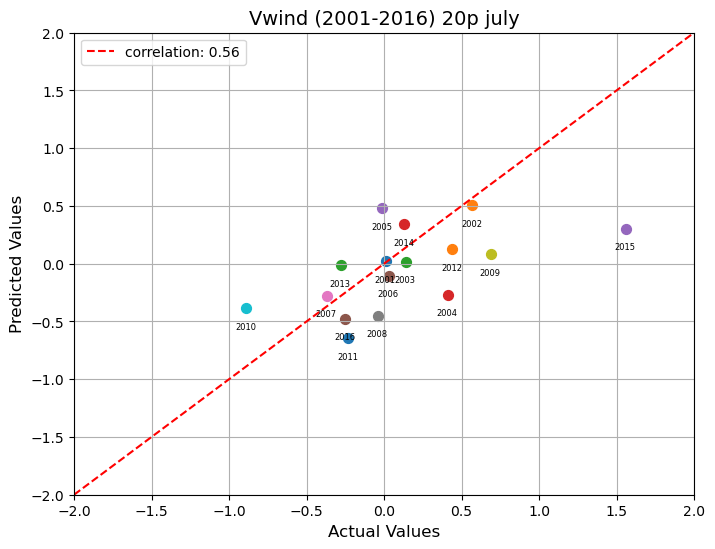

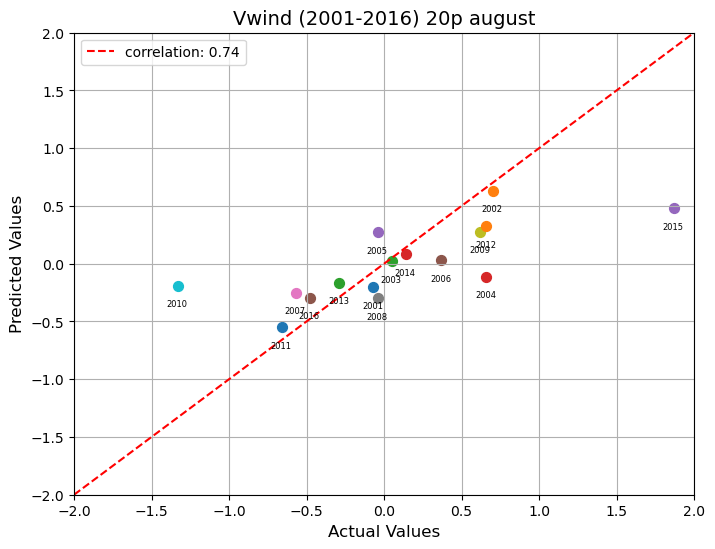

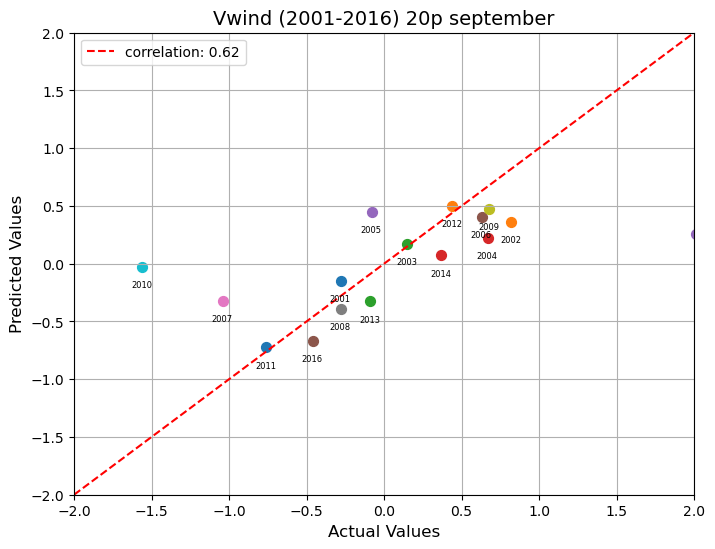

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=50)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()